In [3]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from utils import draw_single_digit,test_single_image

Im Folgenden definieren wir zunächst ein paar Hyperparameter.
Weißt du, was welche Hyperparameter bedeuten könnten? Was könnten sinnvolle Größen sein?

In [5]:
n_epochs = ...
batch_size_train = ...
batch_size_test = ...
learning_rate = ...
log_interval = ...


Das Rückgrat jedes Machine Learning Modells sind Daten. Wir nutzen für unser Beispiel den sogenannten MNIST Datensatz (siehe: https://de.wikipedia.org/wiki/MNIST-Datenbank). Dieser enthält handschriftlich geschriebene Zahlen und zugehörige Labels. Der Datensatz ist in 50'000 Training und 10'000 Testdaten eingeteilt. Mit "Daten" ist jeweils ein Bild einer handschriftlichen Zahl und das dazugehörige Label gemeint.

Pytorch bietet freundlicherweise direkt Funktionen zum Herunterladen dieses Datensatzes an. Wenn wir diese Funktionen nutzen liegen die Daten weiterhin direkt in einem für uns nutzbaren Format vor. Dafür müssen wir nur die unten angegebenen Funktionen aufrufen. Aber was bedeuten die einzelnen Parameter?

In [8]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
                               transform=torchvision.transforms.ToTensor()),
    batch_size=batch_size_train, shuffle=True)


test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
                               transform=torchvision.transforms.ToTensor()),
    batch_size=batch_size_test, shuffle=True)


Manchmal ist es schön, sich die Zahlen direkt anzeigen lassen zu können.
Mit der folgenden Funktion kannst du eine beliebige Zahl aus dem Datensatz direkt anzeigen lassen. Der Index, den du hier angibst bezieht sich immer auf den Test-Teil der Daten, denn den wollen wir nach dem Training ja auch näher mit unserem Netzwerk untersuchen. Spiel ruhig ein bisschen rum und schau dir an, welche Zahlen so dabei sind!

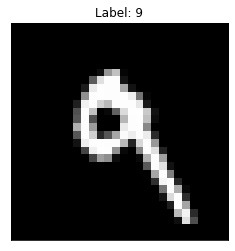

In [4]:
draw_single_digit(7)


Jetzt wird es langsam Zeit, ein Netzwerk zu kreieren.

Wichtige Frage - wie groß ist unser Output? Um diese Frage zu beantworten hilft es, uns ins Gedächtnis zu rufen, dass wir es hier mit einem sogenannten Klassifizierungsproblem zu tun haben. Das bedeutet, dass wir 10 mögliche Antworten haben (0-9) und wissen wollen, in welche dieser Klassen unser Ergebnis fällt. Daher kann der Output des NN ruhig auch größer als nur eine Zahl sein...


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # Hier müssen Layer und Aktivierungsfunktionen hin

    def forward(self, x):
        # Und hier musst du alle Layer und Aktivierungsfunktionen durchgehen
        return x
network = NeuralNet()

Super! Jetzt können wir unseren Trainingsloop schreiben. Einiges davon hast du schon so im Beispiel von Karan genutzt. Einiges ist bereits eingetragen, weil es ein bisschen sehr technisch ist.

In [ ]:
# Das ist unsere Loss-Funktion, also die, die wir optimieren wollen. Der Cross-Entropy-Loss ist ein Standard für Klassifizierungsprobleme. Du musst nicht
criterion = nn.CrossEntropyLoss()

# Was macht der Optimizer nochmal?
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)
for epoch in range(0, n_epochs):

    # Das ist eine pytorch Spezialität. Wir müssen dem, Netz mitteilen, dass wir es jetzt gleich trainieren.
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        ...

        # Das müssen wir ausführen, bevor wir die Daten ins Netz stecken.
        # Ebenfalls so ein pytorch-interna ;)
        data = data.reshape(-1, 28*28)

        ...

        # Das hier ist ein bisschen Output, der uns beim Analysieren des Trainings hilft.
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))


Jetzt, da wir das Netzwerk trainiert haben, können wir das Netzwerk testen. Dafür iterieren wir durch das gesamte Netz, und zählen, wie oft unser Netzwerk richtig liegt. Auf Grundlage dessen kannst du jetzt versuchen, das Netzwerk zu optimieren!

In [ ]:
# Wieder ein pytorch interna! ~~~
with torch.no_grad():

    # Wir zählen die Anzahl der richtigen Treffer und die Anzahl
    # der gesamten Daten.
    n_correct = 0
    n_samples = 0
    for data, target in test_loader:

        # Brauchen wir, genauso wie oben.
        data = data.reshape(-1, 28*28)

        # Wenn unser Netz mehrere Werte ausgibt, müssen wir
        # das mit der maximalen Warscheinlichkeit aus der Liste auswählen.
        # Das machen wir mit torch.max, so wie hier gezeigt.
        _, vorhersage = torch.max(..., 1)
        n_samples += target.size(0)

        # Hiermit zählen wir einfach.
        n_correct += (vorhersage == target).sum().item()

    # Wie bestimmen wir aus n_correct und n_samples nun die Genauigkeit?
    acc = ...
    print(f'Accuracy of the network on the 10000 test images: {acc} %')


Natürlich wäre es auch cool, nochmal eine Zahl zu zeichnen und zu schauen, was für ein Ergebnis rauskommt, oder? Also ob das Netz richtig liegt, oder nicht. Das kannst du mit der folgenden Funktion.

In [ ]:
test_single_image(network,5)